# Exasens Dataset

In [24]:
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE


# Importing the data

In [25]:
data = pd.read_csv('Exasens.csv')
data.head()

,Diagnosis,ID,Imaginary Part,Unnamed: 3,Real Part,Unnamed: 5,Gender,Age,Smoking,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Min,Avg.,Min,Avg.,NaN,NaN,NaN,NaN,NaN,Gender,Somking
2,COPD,301-4,-320.61,-300.5635307,-495.26,-464.1719907,1.0,77.0,2.0,NaN,NaN,Male=1,Non-smoker=1
3,COPD,302-3,-325.39,-314.7503595,-473.73,-469.2631404,0.0,72.0,2.0,NaN,NaN,Female=0,Ex-smoker=2
4,COPD,303-3,-323,-317.4360556,-476.12,-471.8976667,1.0,73.0,3.0,NaN,NaN,NaN,Active-smoker=3


In [26]:
data.drop([0,1],inplace=True)
data.drop(['Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12'], axis = 1,inplace=True)
data.reset_index(drop=True, inplace = True)

In [27]:
data.rename(columns={'Imaginary Part':'Imaginary Part: Min','Unnamed: 3':'Imaginary Part: Avg','Real Part':'Real Part: Min','Unnamed: 5':'Real Part: Avg'}, inplace = True)

In [28]:
data.head()

,Diagnosis,ID,Imaginary Part: Min,Imaginary Part: Avg,Real Part: Min,Real Part: Avg,Gender,Age,Smoking
0,COPD,301-4,-320.61,-300.5635307,-495.26,-464.1719907,1.0,77.0,2.0
1,COPD,302-3,-325.39,-314.7503595,-473.73,-469.2631404,0.0,72.0,2.0
2,COPD,303-3,-323,-317.4360556,-476.12,-471.8976667,1.0,73.0,3.0
3,COPD,304-4,-327.78,-317.3996698,-473.73,-468.856388,1.0,76.0,2.0
4,COPD,305-4,-325.39,-316.1557853,-478.52,-472.8697828,0.0,65.0,2.0


# Data Cleaning and Balancing

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Diagnosis            399 non-null    object 
 1   ID                   399 non-null    object 
 2   Imaginary Part: Min  100 non-null    object 
 3   Imaginary Part: Avg  100 non-null    object 
 4   Real Part: Min       100 non-null    object 
 5   Real Part: Avg       100 non-null    object 
 6   Gender               399 non-null    float64
 7   Age                  399 non-null    float64
 8   Smoking              399 non-null    float64
dtypes: float64(3), object(6)
memory usage: 28.2+ KB


In [30]:
data[['Imaginary Part: Min','Imaginary Part: Avg','Real Part: Min','Real Part: Avg']] = data[['Imaginary Part: Min','Imaginary Part: Avg','Real Part: Min','Real Part: Avg']].astype('float64')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Diagnosis            399 non-null    object 
 1   ID                   399 non-null    object 
 2   Imaginary Part: Min  100 non-null    float64
 3   Imaginary Part: Avg  100 non-null    float64
 4   Real Part: Min       100 non-null    float64
 5   Real Part: Avg       100 non-null    float64
 6   Gender               399 non-null    float64
 7   Age                  399 non-null    float64
 8   Smoking              399 non-null    float64
dtypes: float64(7), object(2)
memory usage: 28.2+ KB


In [32]:
data.describe()

,Imaginary Part: Min,Imaginary Part: Avg,Real Part: Min,Real Part: Avg,Gender,Age,Smoking
count,100.000000,100.000000,100.000000,100.000000,399.000000,399.000000,399.000000
mean,-314.941800,-304.779677,-473.002200,-458.701666,0.398496,48.736842,1.726817
std,28.422753,25.834316,49.009819,43.725345,0.490203,18.566962,0.742167
min,-337.350000,-328.280985,-626.860000,-473.928698,0.000000,17.000000,1.000000
25%,-327.780000,-318.476799,-476.120000,-470.036232,0.000000,31.000000,1.000000
50%,-323.000000,-314.327176,-473.730000,-467.136002,0.000000,49.000000,2.000000
75%,-320.610000,-305.072319,-468.950000,-462.804774,1.000000,64.000000,2.000000
max,-225.000000,-225.000000,-44.000000,-44.000000,1.000000,93.000000,3.000000


<Axes: >

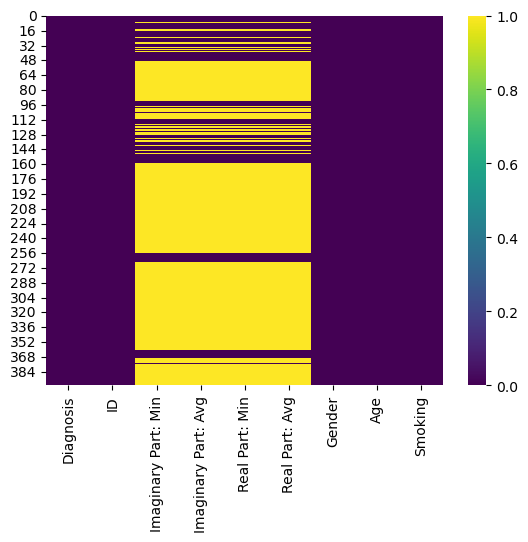

In [33]:
sns.heatmap(data.isnull(),cmap='viridis')

In [34]:
# What is this Imaginary Part/Real Part?

In [35]:
data.dropna(inplace=True)

In [36]:
# Checking for class imbalance?
data['Diagnosis'].value_counts(normalize=True)*100

COPD        40.0
HC          40.0
Asthma      10.0
Infected    10.0
Name: Diagnosis, dtype: float64

In [37]:
X = data.drop(['Diagnosis','ID'], axis = 1)
y = data['Diagnosis']

In [38]:
# Balancing the classes using smote
smoter = SMOTE()
X_smoted, y_smoted = smoter.fit_resample(X,y)
smoted_data = pd.concat([pd.DataFrame(X_smoted, columns=X.columns), pd.Series(y_smoted, name='Diagnosis')], axis=1)

# Display the resampled DataFrame

In [39]:
# Now our data is balanced
smoted_data['Diagnosis'].value_counts()

COPD        40
HC          40
Asthma      40
Infected    40
Name: Diagnosis, dtype: int64

In [40]:
smoted_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Imaginary Part: Min  160 non-null    float64
 1   Imaginary Part: Avg  160 non-null    float64
 2   Real Part: Min       160 non-null    float64
 3   Real Part: Avg       160 non-null    float64
 4   Gender               160 non-null    float64
 5   Age                  160 non-null    float64
 6   Smoking              160 non-null    float64
 7   Diagnosis            160 non-null    object 
dtypes: float64(7), object(1)
memory usage: 10.1+ KB


In [41]:
smoted_data.to_csv('cleaned_data.csv')

In [42]:
data.to_csv('imbalanced_data.csv')